In [53]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
# Loading the dataset using pandas
data = pd.read_csv('California_Houses.csv')

### The following are the what the features in the dataset mean,
1) <u>**Median House Value:**</u> Median house value for households within a block (measured in US Dollars) [$]
2) <u>**Median Income:**</u> Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]
3) <u>**Median Age:**</u> Median age of a house within a block; a lower number is a newer building [years]
4) <u>**Total Rooms:**</u> Total number of rooms within a block
5) <u>**Total Bedrooms:**</u> Total number of bedrooms within a block
6) <u>**Population:**</u> Total number of people residing within a block
7) <u>**Households:**</u> Total number of households, a group of people residing within a home unit, for a block
8) <u>**Latitude:**</u> A measure of how far north a house is; a higher value is farther north [°]
9) <u>**Longitude:**</u> A measure of how far west a house is; a higher value is farther west [°]
10) <u>**Distance to coast:**</u> Distance to the nearest coast point [m]
11) <u>**Distance to Los Angeles:**</u> Distance to the centre of Los Angeles [m]
12) <u>**Distance to San Diego:**</u> Distance to the centre of San Diego [m]
13) <u>**Distance to San Jose:**</u> Distance to the centre of San Jose [m]
14) <u>**Distance to San Francisco:**</u> Distance to the centre of San Francisco [m]

In [3]:
# Looking the first 5 rows of the dataset
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [4]:
# Checking the number of rows and columns in the dataset
data.shape

(20640, 14)

In [5]:
# Getting the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [6]:
# Descriptive statistics of the dataset
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [7]:
# Checking the number of missing values in each column
data.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [3]:
# Histogram to visualize the distribution of house prices in California
fig = px.histogram(data, 
                   x = 'Median_House_Value',
                   nbins = 50,
                   title = 'Distribution of House Prices in California',
                   labels = {'Median_House_Value':'Median House Price (In USD)'}
                   )
fig.update_layout(bargap=0.1)
fig.update_layout(width=1000, height=600)
#fig.write_image('histogram_house_prices.png')
#fig.show(renderer='png')
fig.show()

- The Median House Prices are almost normally distributed with slightly rightly skewed. 

In [9]:
# Histogram to visualize the distribution of house ages in California
fig = px.histogram(data,
                   x = 'Median_Age',
                   title = 'Distribution of House Age in California',
                   color_discrete_sequence = ['indianred'],
                   labels = {'Median_Age':'Median House Age (In Years)'}
                    )
fig.update_layout(bargap = 0.1, width = 1000, height = 600)
fig.show()

In [10]:
# Corralation matrix to see the correlation between different features
data.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248


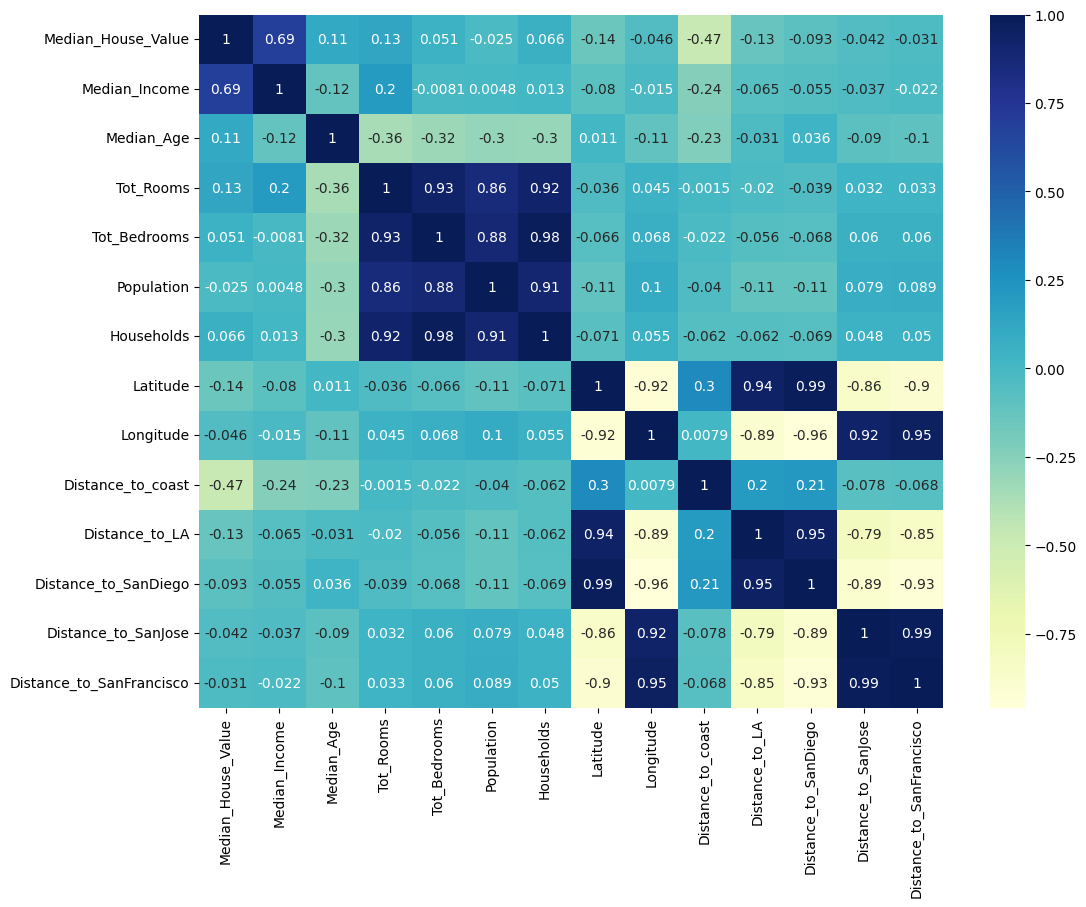

In [88]:
# Corralation matrix heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),
            annot = True,
            cmap = 'YlGnBu'
            )
plt.show()

### From the correlation matrix of the dataset, I can see that there exists multi-colinearity betweem many feature and they are,
- Tot_Rooms
- Tot_Bedrooms
- Population
- Households
- Latitude
- Longitude
- Distance_to_LA
- Distance_to_SanDiego
- Distance_to_SanJose
- Distance_to_SanFrancisco

### So, I will be only using the following features to train the model because the following features has the highest correlation with the 'Price' feature
- median income
- median age
- tot rooms
- distance to coast
- distance to la

In [3]:
# Create a new feature named 'Rooms_per_Household' by dividing 'Tot_Rooms' by 'Households'
data['Rooms_per_Household'] = data['Tot_Rooms'] / data['Households']

In [5]:
data.sample()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Rooms_per_Household
956,285400.0,7.316,13,3742,555,1590,559,37.69,-121.92,22114.963376,522727.387022,701831.231659,39492.543185,45923.698146,6.694097


In [6]:
# Computing the correlation matrix again to see the correlation of the new feature with other features
data.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Rooms_per_Household
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559,0.151948
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424,0.326895
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447,-0.153277
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920,0.133798
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250,0.000787
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618,-0.072213
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157,-0.080598
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397,0.106389
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864,-0.027540
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248,0.185594


In [4]:
# Computing the correlation between 'bedroom_to_room_ratio' and 'Median_House_Value' for testing 
(data['Tot_Bedrooms']/data['Tot_Rooms']).corr(data['Median_House_Value'])

np.float64(-0.2556241671955807)

In [5]:
# Creating the new feature 'Bedroom_to_Room_Ratio' by dividing 'Tot_Bedrooms' by 'Tot_Rooms'
data['Bedroom_to_Room_Ratio'] = data['Tot_Bedrooms'] / data['Tot_Rooms']

In [9]:
# Computing the correlation matrix again to see the correlation of the new feature with other features
data.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Rooms_per_Household,Bedroom_to_Room_Ratio
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559,0.151948,-0.255624
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424,0.326895,-0.615479
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447,-0.153277,0.136367
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920,0.133798,-0.187361
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250,0.000787,0.086110
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618,-0.072213,0.037075
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157,-0.080598,0.067022
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397,0.106389,-0.114302
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864,-0.027540,0.092868
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248,0.185594,-0.077337


#### I've create the following new features:

- Rooms_per_Household
- Bedrooms_to_Room_Ratio

##### these new features have better correlation with 'Price' feature and doesn't have multi colinearity with other features. SO, I'll be adding these new features to final training data.

#### The final features are as follows,
1. Median_House_Value
2. Median_Income
3. Median_Age
4. Rooms_per_Household
5. Bedroom_to_Room_Ratio
6. Distance_to_coast
7. Distance_to_LA

In [6]:
# Final dataset with selected features
final_data = data[['Median_House_Value', 'Median_Income', 'Median_Age', 'Rooms_per_Household', 'Bedroom_to_Room_Ratio', 'Distance_to_coast', 'Distance_to_LA']]
final_data

,Median_House_Value,Median_Income,Median_Age,Rooms_per_Household,Bedroom_to_Room_Ratio,Distance_to_coast,Distance_to_LA
0,452600.0,8.3252,41,6.984127,0.146591,9263.040773,556529.158342
1,358500.0,8.3014,21,6.238137,0.155797,10225.733072,554279.850069
2,352100.0,7.2574,52,8.288136,0.129516,8259.085109,554610.717069
3,341300.0,5.6431,52,5.817352,0.184458,7768.086571,555194.266086
4,342200.0,3.8462,52,6.281853,0.172096,7768.086571,555194.266086
...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,5.045455,0.224625,162031.481121,654530.186299
20636,77100.0,2.5568,18,6.114035,0.215208,160445.433537,659747.068444
20637,92300.0,1.7000,17,5.205543,0.215173,153754.341182,654042.214020
20638,84700.0,1.8672,18,5.329513,0.219892,152005.022239,657698.007703


In [11]:
# Computing the correlation matrix of our final dataset
final_data.corr()

,Median_House_Value,Median_Income,Median_Age,Rooms_per_Household,Bedroom_to_Room_Ratio,Distance_to_coast,Distance_to_LA
Median_House_Value,1.000000,0.688075,0.105623,0.151948,-0.255624,-0.469350,-0.130678
Median_Income,0.688075,1.000000,-0.119034,0.326895,-0.615479,-0.243443,-0.065421
Median_Age,0.105623,-0.119034,1.000000,-0.153277,0.136367,-0.226621,-0.031435
Rooms_per_Household,0.151948,0.326895,-0.153277,1.000000,-0.418704,0.185594,0.110041
Bedroom_to_Room_Ratio,-0.255624,-0.615479,0.136367,-0.418704,1.000000,-0.077337,-0.133605
Distance_to_coast,-0.469350,-0.243443,-0.226621,0.185594,-0.077337,1.000000,0.197672
Distance_to_LA,-0.130678,-0.065421,-0.031435,0.110041,-0.133605,0.197672,1.000000


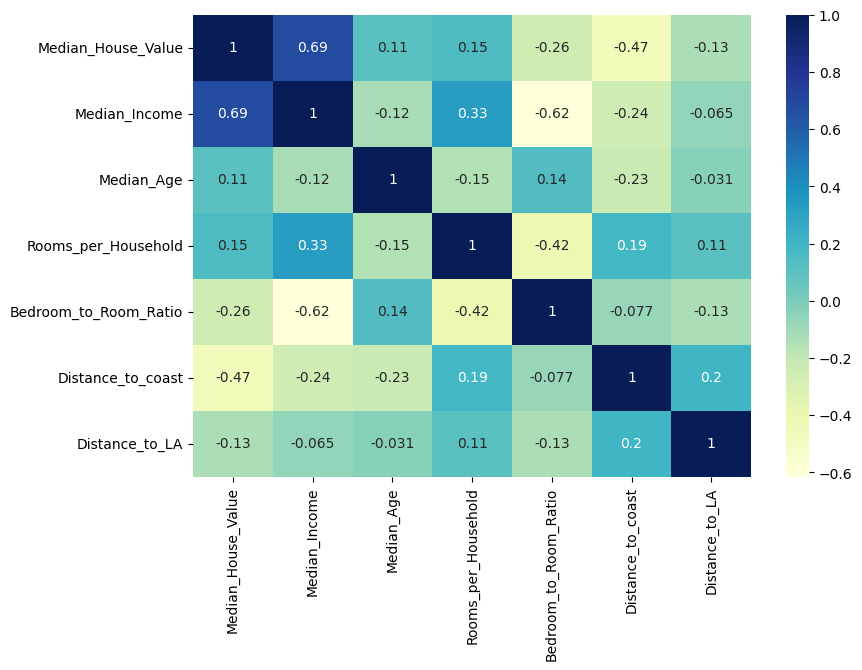

In [93]:
# Corralation matrix heatmap of our final dataset
plt.figure(figsize=(9,6))
sns.heatmap(final_data.corr(),
            annot = True,
            cmap = 'YlGnBu'
            )
plt.show()   

In [7]:
# Importing the required Scikit-Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [71]:
# Splitting the data into features and target variable
X_data = final_data.drop('Median_House_Value', axis=1)
Y_data = final_data['Median_House_Value']

In [9]:
# Shapes of X_data and Y_data
print(f'X_data --> {X_data.shape}')
print(f'Y_data --> {Y_data.shape}')

X_data --> (20640, 6)
Y_data --> (20640,)


In [9]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [10]:
# Shapes of the training and testing sets
print(f'x_train --> {x_train.shape}')
print(f'y_train --> {y_train.shape}')
print(f'x_test --> {x_test.shape}')
print(f'y_test --> {y_test.shape}')

x_train --> (16512, 6)
y_train --> (16512,)
x_test --> (4128, 6)
y_test --> (4128,)


In [11]:
x_train.sample()

,Median_Income,Median_Age,Rooms_per_Household,Bedroom_to_Room_Ratio,Distance_to_coast,Distance_to_LA
11723,3.01,21,10.553648,0.213501,183900.056729,600208.184024


- here, the features have very wide range of values. 
Let's Standadize them:

In [12]:
# Initializing the StandardScaler object
standard_scaler = StandardScaler()
standard_scaler

,copy,True
,with_mean,True
,with_std,True


In [13]:
# Standardizing the feature variables
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [15]:
# Fitted StandardScaler object
standard_scaler

,copy,True
,with_mean,True
,with_std,True


In [24]:
x_train[0:5]

array([[-0.326196  ,  0.34849025, -0.17491646, -0.2117846 , -0.57891577,
        -0.33717322],
       [-0.03584338,  1.61811813, -0.40283542,  0.34218528, -0.78250613,
        -0.96083341],
       [ 0.14470145, -1.95271028,  0.08821601, -0.66165785, -0.55154934,
        -0.21982973],
       [-1.01786438,  0.58654547, -0.60001532,  0.78303162, -0.71997526,
        -0.3474564 ],
       [-0.17148831,  1.14200767,  0.3490073 , -0.55036364,  2.78424422,
         0.25737816]])

In [25]:
# Initializing the LinearRegression model
linear_model = LinearRegression()
linear_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Fitting the model on the training data
linear_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
# Making predictions on the testing data
y_pred = linear_model.predict(x_test)
y_pred

array([ 25697.92745659, 131432.26953148, 264940.14449297, ...,
       429273.39651367,  70339.76538453, 202779.58722181], shape=(4128,))

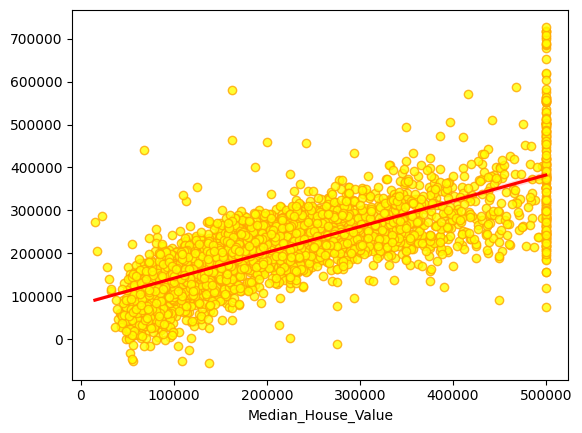

In [28]:
# Visualizing the model's predictions
sns.regplot(x = y_test,
            y = y_pred,
            scatter_kws = {'color': 'yellow', 'edgecolor': 'orange'},
            line_kws = {'color': 'red'}
            )
plt.show()

In [29]:
# Calculating the model's residuals
residuals = y_test - y_pred
residuals

20046     22002.072543
3024     -85632.269531
15663    235060.855507
20484    -51409.976490
9814      60371.846734
             ...      
15362     44235.436664
16623     89326.475097
18086     70727.603486
2144       1960.234615
3665     -51279.587222
Name: Median_House_Value, Length: 4128, dtype: float64

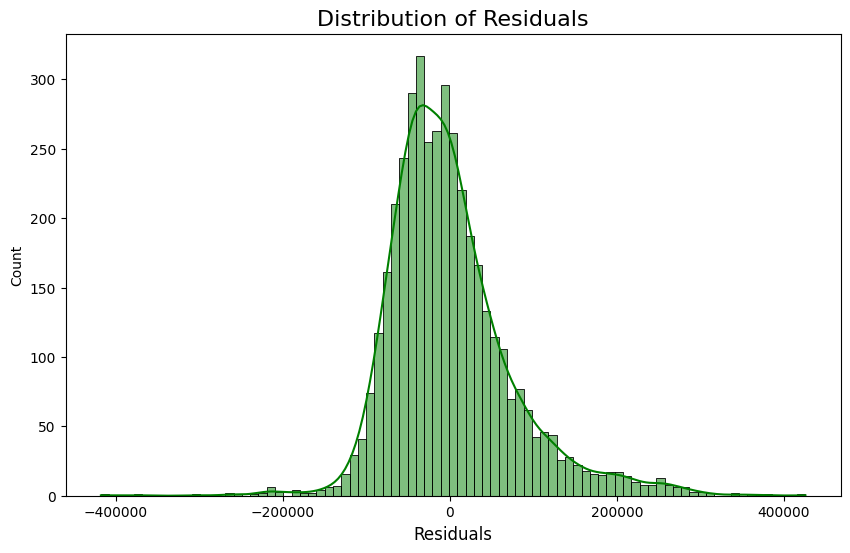

In [30]:
# Visualizing the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals', size=12)
plt.title('Distribution of Residuals', size=16)
plt.show()

In [31]:
# Importing the required metrics from Scikit-Learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Mean of the Median House Value feature
data.Median_House_Value.mean()

np.float64(206855.81690891474)

In [33]:
# Mean Absolute Error (MAE)
mean_absolute_error(y_test, y_pred)

54245.9406412442

In [34]:
# R^2 Score 
r2_score(y_test, y_pred)

0.5797525248998128

#### Let's use Polynomial Features to improve the model's performance

In [35]:
# Importing PolynomialFeatures from Scikit-Learn
from sklearn.preprocessing import PolynomialFeatures

In [36]:
# Function to test different polynomial degrees and evaluate model performance
def Best_Polynomial_Degree_Test(X, Y):
    
    for degree in [1, 2, 3, 4, 5]:
        
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        polynomial_converter = PolynomialFeatures(degree=degree)
        x_train = polynomial_converter.fit_transform(x_train)
        x_test = polynomial_converter.transform(x_test)
        print(f'Polynomial Degree: {degree} -> X_train shape: {x_train.shape}, X_test shape: {x_test.shape}')
        
        standard_scaler = StandardScaler()
        x_train = standard_scaler.fit_transform(x_train)
        x_test = standard_scaler.transform(x_test)
        
        
        linear_model = LinearRegression()
        linear_model.fit(x_train, y_train)
        y_pred = linear_model.predict(x_test)
        print(f'MSE -> {mean_squared_error(y_test, y_pred)}')
        print(f'MAE -> {mean_absolute_error(y_test, y_pred)}')
        print(f'R² Score -> {r2_score(y_test, y_pred)}')
        print('\n-----------------------------------------\n')

In [37]:
Best_Polynomial_Degree_Test(X_data, Y_data)

Polynomial Degree: 1 -> X_train shape: (16512, 7), X_test shape: (4128, 7)
MSE -> 5506960644.543542
MAE -> 54245.94064124419
R² Score -> 0.5797525248998128

-----------------------------------------

Polynomial Degree: 2 -> X_train shape: (16512, 28), X_test shape: (4128, 28)
MSE -> 4766012072.127918
MAE -> 49660.75518914725
R² Score -> 0.636295831967983

-----------------------------------------

Polynomial Degree: 3 -> X_train shape: (16512, 84), X_test shape: (4128, 84)
MSE -> 4599317028.455584
MAE -> 47197.74594552944
R² Score -> 0.6490166730519711

-----------------------------------------

Polynomial Degree: 4 -> X_train shape: (16512, 210), X_test shape: (4128, 210)
MSE -> 58482315135.0677
MAE -> 49459.64313814969
R² Score -> -3.462905558963331

-----------------------------------------

Polynomial Degree: 5 -> X_train shape: (16512, 462), X_test shape: (4128, 462)
MSE -> 197700325975558.53
MAE -> 266364.44793055573
R² Score -> -15085.917844606998

------------------------------

- The metrics are the best for **degree=3**
- We will use polynomial features with degree 3 for the model.

In [39]:
# Initializing PolynomialFeatures with degree 3
polynomial_converter = PolynomialFeatures(degree=3)
polynomial_converter

,degree,3
,interaction_only,False
,include_bias,True
,order,'C'


In [40]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [41]:
# Creating polynomial features for training and testing sets
x_train_poly = polynomial_converter.fit_transform(x_train)
x_test_poly = polynomial_converter.transform(x_test)

In [44]:
# Fitted PolynomialFeatures object
polynomial_converter

,degree,3
,interaction_only,False
,include_bias,True
,order,'C'


In [45]:
# Saving the fitted PolynomialFeatures object
pickle.dump(polynomial_converter, open('polynomial_features.pkl', 'wb'))

In [43]:
# Shapes of the polynomial feature sets
print(f'x_train_poly shape: {x_train_poly.shape}')
print(f'x_test_poly shape: {x_test_poly.shape}')

x_train_poly shape: (16512, 84)
x_test_poly shape: (4128, 84)


In [46]:
# Initializing the StandardScaler object
standard_scaler = StandardScaler()
standard_scaler

,copy,True
,with_mean,True
,with_std,True


In [47]:
# Standardizing the polynomial feature variables
x_train_scaled = standard_scaler.fit_transform(x_train_poly)
x_test_scaled = standard_scaler.transform(x_test_poly)

In [51]:
# Fitted StandardScaler object
standard_scaler

,copy,True
,with_mean,True
,with_std,True


In [52]:
# Saving the fitted StandardScaler object
pickle.dump(standard_scaler, open('standard_scaler.pkl', 'wb'))

In [48]:
# Sample of the scaled training data
x_train_scaled[0]

array([ 0.        , -0.326196  ,  0.34849025, -0.17491646, -0.2117846 ,
       -0.57891577, -0.33717322, -0.36626292, -0.00715459, -0.35688022,
       -0.41852425, -0.60222041, -0.36724998,  0.14871931,  0.17657333,
        0.12507062, -0.4662459 , -0.16746851, -0.05693168, -0.20836543,
       -0.38758085, -0.32949236, -0.2472699 , -0.57278643, -0.33692124,
       -0.42822582, -0.43744398, -0.59005341, -0.29725585, -0.21411915,
       -0.347707  , -0.41157622, -0.51029315, -0.32879629, -0.02620657,
       -0.12825709,  0.01108109, -0.5222062 , -0.21263573, -0.16024374,
       -0.38451495, -0.40869712, -0.36653172, -0.37554579, -0.62673027,
       -0.37343779, -0.41525907, -0.45322673, -0.57041377, -0.03141198,
        0.09755993,  0.02642746, -0.36413309, -0.14796342, -0.01765077,
        0.14131032, -0.33810396, -0.2004737 , -0.08143525, -0.46503349,
       -0.18328598, -0.38436413, -0.37178198, -0.48732813, -0.01680338,
       -0.05372579, -0.06490957, -0.06502661, -0.27956261, -0.37

In [49]:
# Initializing the LinearRegression model
linear_model = LinearRegression()
linear_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# Fitting the model on the scaled training data
linear_model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# Making predictions on the scaled testing data
y_pred = linear_model.predict(x_test_scaled)

In [163]:
# Scatterplot to visualize predicted vs actual house prices
fig = px.scatter(x = y_test,
                 y = y_pred,
                 title = 'Predicted vs Actual House Prices',
                 labels = {'x':'Actual House Prices', 'y':'Predicted House Prices'},
                )
fig.update_layout(width=1000, height=600)

fig.show()

In [35]:
# Evaluating the final model's performance
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 47197.74594552944
R² Score: 0.6490166730519711


In [36]:
# Checking for any negative predictions
y_pred[y_pred < 0]

array([-777553.47371435])

In [37]:
# Finding exact (or nearly-equal) positions in y_pred
np.where(np.isclose(y_pred, -777553.47371435, atol=1e-6))[0]

array([3722])

In [52]:
# Checking the y_pred value at position 3722
y_pred[3722]

np.float64(-777553.4737143532)

In [53]:
# Checking the x_test_scaled value at position 3722
x_test_scaled[3722]

array([ 0.00000000e+00,  3.90836872e-01,  4.27841989e-01,  5.32392079e+01,
        7.61881523e-01,  2.25262008e+00,  1.13780091e+00,  1.22865927e-01,
        6.58290990e-01,  3.36298015e+01,  1.73142130e+00,  3.56368498e+00,
        1.37333197e+00,  2.37882230e-01,  5.15099732e+01,  7.41143771e-01,
        3.09880456e+00,  1.28281568e+00,  9.91645313e+01,  7.61077409e+01,
        4.20935902e+01,  3.93730810e+01,  5.09675707e-01,  2.91895612e+00,
        1.60570607e+00,  2.05895777e+00,  2.77046752e+00,  1.01035757e+00,
       -5.00307723e-02,  2.83305062e-01,  1.47173013e+01,  7.36990929e-01,
        3.22838120e+00,  8.33351380e-01,  4.61294951e-01,  3.57900695e+01,
        1.55698416e+00,  5.49400665e+00,  1.57026375e+00,  1.89510730e+02,
        6.44067584e+01,  5.75457033e+01,  3.98089125e+01,  2.02247399e+00,
        5.28963732e+00,  2.38424460e+00,  3.34431603e+00,  4.52401441e+00,
        1.35838740e+00,  5.42887760e-02,  3.50516629e+01,  4.49544026e-01,
        2.86512480e+00,  

In [57]:
# Checking the actual value from y_test at position 3722
y_test.iloc[3722]

np.float64(162500.0)

In [58]:
# Removing the outlier from both y_pred and y_test
y_pred = np.delete(y_pred, 3722)
y_test = np.delete(y_test, 3722)

In [59]:
# Evaluating the final model's performance again after removing the outlier
fig = px.scatter(x = y_test,
                 y = y_pred,
                 title = 'Predicted vs Actual House Prices (Outlier Removed)',
                 labels = {'x':'Actual House Prices', 'y':'Predicted House Prices'},
                )
fig.update_layout(width=1000, height=600)
fig.show()

In [60]:
# Evaluating the final model's performance again after removing the outlier
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R² Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 46981.40096666613
R² Score: 0.6653417141403812


In [65]:
# Saving the trained model as a pickle file
pickle.dump(linear_model, open('regression_model.pkl', 'wb'))

In [60]:
# Loading the saved model from the pickle file
model = pickle.load(open('regression_model.pkl', 'rb'))
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
# Loading the saved scaler, polynomial features, and model from the pickle files
model_test = pickle.load(open('regression_model.pkl', 'rb'))
scaler_test = pickle.load(open('standard_scaler.pkl', 'rb'))
poly_test = pickle.load(open('polynomial_features.pkl', 'rb'))

In [92]:
# test Function to make predictions using the saved model, scaler, and polynomial features
def predict(lst):
    poly = poly_test.transform([lst])
    scaled = scaler_test.transform(poly)
    pred = model_test.predict(scaled.reshape(1, -1))
    return pred

In [93]:
X_data.sample()

,Median_Income,Median_Age,Rooms_per_Household,Bedroom_to_Room_Ratio,Distance_to_coast,Distance_to_LA
7068,4.6184,36,5.760135,0.175367,25748.032801,23545.941582


In [94]:
# Testing the predict function with a sample input
predict([6.1354, 46, 8.45215, 0.321552, 3245, 484578])

c:\Users\HI\Documents\GitHub\California-House-Price-Prediction\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([597784.24844224])